
Training for AND Gate
Using Adaline for AND Gate
True Labels: [0 0 0 1]
Predictions: [0 0 0 1]


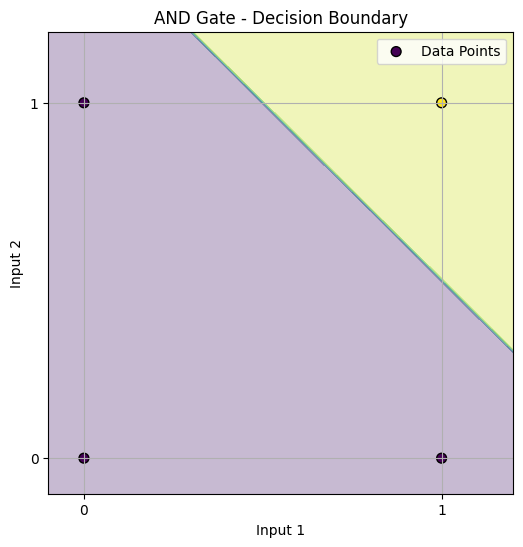


Training for OR Gate
Using Adaline for OR Gate
True Labels: [0 1 1 1]
Predictions: [0 1 1 1]


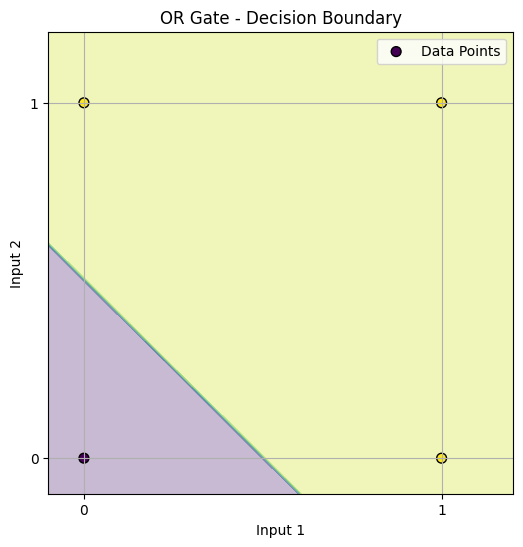


Training for XOR Gate
Using Madaline for XOR Gate
True Labels: [0 1 1 0]
Predictions: [0 0 1 0]


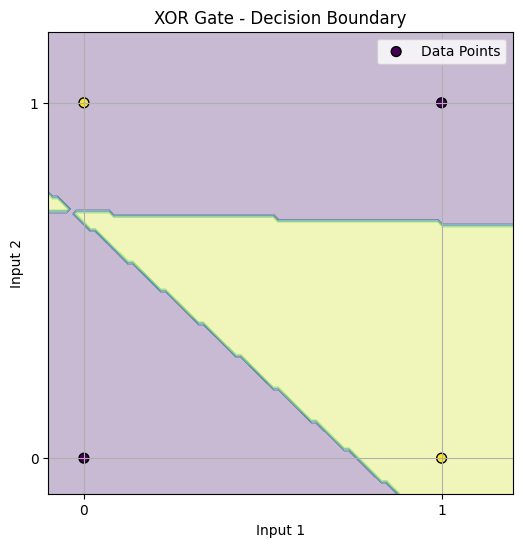


Training for NOR Gate
Using Adaline for NOR Gate
True Labels: [1 0 0 0]
Predictions: [1 0 0 0]


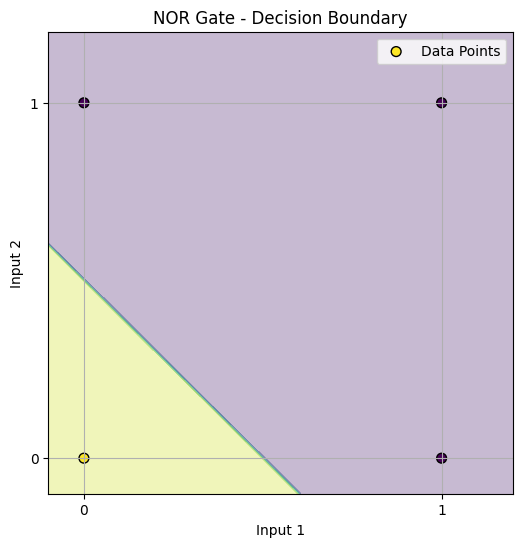


Training for XNOR Gate
Using Madaline for XNOR Gate
True Labels: [1 0 0 1]
Predictions: [1 1 1 1]


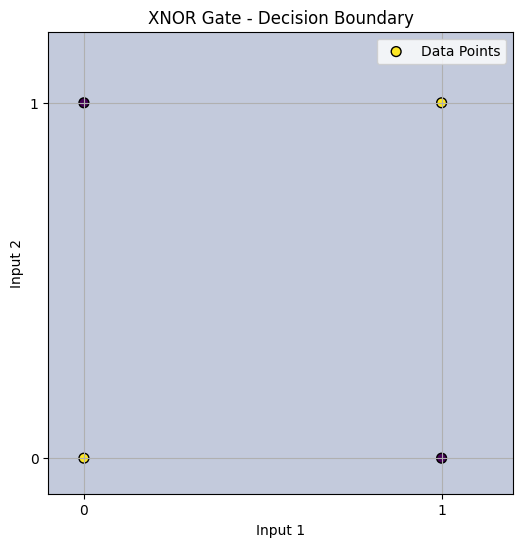


Training for NOT Gate
Using Adaline for NOT Gate
Adaline converged at epoch 182
True Labels: [1 0]
Predictions: [1 0]


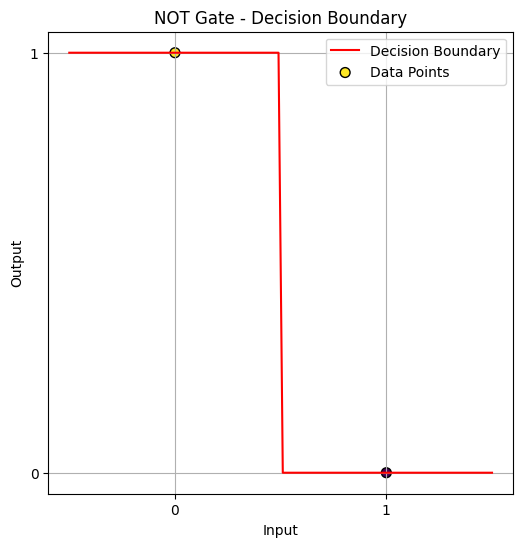

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# ... (Adaline and create_dataset remain the same)

class Madaline:
    def __init__(self, n_neurons=2, learning_rate=0.1, epochs=1000, gate_type="XOR"): # added gate_type
        self.weights = []
        self.biases = []
        self.n_neurons = n_neurons
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.gate_type = gate_type # store gate type

    def fit(self, X, y):
        n_features = X.shape[1]
        self.weights = np.random.uniform(-1, 1, size=(self.n_neurons, n_features))
        self.biases = np.random.uniform(-1, 1, size=self.n_neurons)

        for _ in range(self.epochs):
            for i, x in enumerate(X):
                neuron_outputs = np.dot(self.weights, x) + self.biases
                neuron_activations = (neuron_outputs >= 0).astype(int)
                if self.gate_type == "XOR": #Use gate_type to select logic
                    predicted_output = (neuron_activations[0] ^ neuron_activations[1]).astype(int)
                elif self.gate_type == "XNOR":
                    predicted_output = (neuron_activations[0] == neuron_activations[1]).astype(int)
                else:
                    raise ValueError("Invalid gate type for Madaline")

                error = y[i] - predicted_output

                if error != 0:
                    if self.gate_type == "XOR": #Use gate_type to select logic
                        if y[i] == 0:
                            for j in range(self.n_neurons):
                                if neuron_activations[j] == 1:
                                    self.weights[j] += self.learning_rate * error * x
                                    self.biases[j] += self.learning_rate * error
                        elif y[i] == 1:
                            for j in range(self.n_neurons):
                                if neuron_activations[j] == 0:
                                    self.weights[j] += self.learning_rate * error * x
                                    self.biases[j] += self.learning_rate * error
                    elif self.gate_type == "XNOR": #Use gate_type to select logic
                        if y[i] == 1:  # Target is 1, neurons outputting different values need adjustment
                            if neuron_activations[0] != neuron_activations[1]:
                                for j in range(self.n_neurons):
                                    self.weights[j] += self.learning_rate * error * x
                                    self.biases[j] += self.learning_rate * error
                        elif y[i] == 0:  # Target is 0, neurons outputting the same value need adjustment
                            if neuron_activations[0] == neuron_activations[1]:
                                for j in range(self.n_neurons):
                                    self.weights[j] += self.learning_rate * error * x
                                    self.biases[j] += self.learning_rate * error

    def predict(self, X):
        neuron_outputs = np.dot(X, self.weights.T) + self.biases
        neuron_activations = (neuron_outputs >= 0).astype(int)

        if self.gate_type == "XOR":
            return (neuron_activations[:, 0] ^ neuron_activations[:, 1]).astype(int)
        elif self.gate_type == "XNOR":
            return (neuron_activations[:, 0] == neuron_activations[:, 1]).astype(int)
        else:
            raise ValueError("Invalid gate type for Madaline")

# ... (plot_decision_boundary remains the same)

if __name__ == "__main__":
    gates = ["AND", "OR", "XOR", "NOR", "XNOR", "NOT"]

    for gate in gates:
        print(f"\nTraining for {gate} Gate")
        X, y = create_dataset(gate)

        if gate in ["XOR", "XNOR"]:
            print(f"Using Madaline for {gate} Gate")
            madaline = Madaline(n_neurons=2, gate_type=gate) #Pass gate_type to Madaline
            madaline.fit(X, y)
            predictions = madaline.predict(X)
        else:
            print(f"Using Adaline for {gate} Gate")
            adaline = Adaline(learning_rate=0.1, epochs=1000)
            adaline.fit(X, y)
            predictions = adaline.predict(X)

        print(f"True Labels: {y}")
        print(f"Predictions: {predictions}")

        if gate in ["XOR", "XNOR"]:
            plot_decision_boundary(X, y, madaline, gate)
        else:
            plot_decision_boundary(X, y, adaline, gate)